# Problem A: Histogram Equalization & Edge Detection

In [ ]:
import cv2
import numpy as np
import math
import scipy.signal # convolution
import matplotlib.pyplot as plt

## A1. Histogram Equalization

In [ ]:
### Histogram Equalization
def HistEqualiztion(img):
    """
        Histogram Equalization Function
    """
    # calculate histogram (TODO)
    hist = np.zeros(256)
    for i in range(256):
      hist[i] = np.sum(img == i)

    # calculate cumulative distribution function (TODO)
    cdf = hist.cumsum()

    # normalize CDF (TODO)
    cdf_normalized = np.zeros(256)
    for i in range(256):
     cdf_normalized[i] = cdf[i] / (img.shape[0] * img.shape[1])

    # equalize cdf (Look-up table conversion of original image) (TODO)
    img_equalized = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        img_equalized[i][j] = round(255 * cdf_normalized[img[i][j]])

    return img_equalized

<ipython-input-4-8d3be65d36d6>:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(), 256, [0, 255])


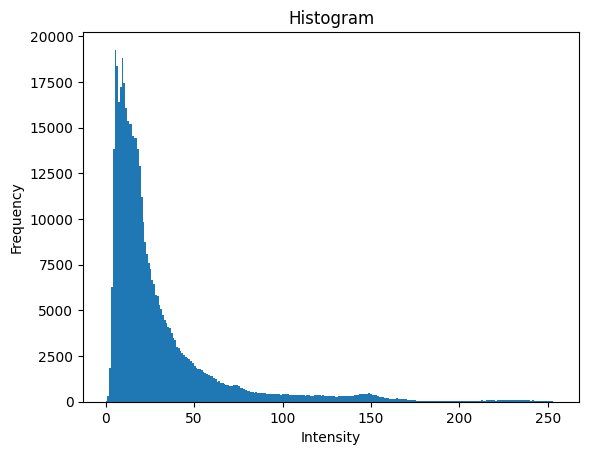

<ipython-input-4-8d3be65d36d6>:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_equalized.ravel(), 256, [0, 255])


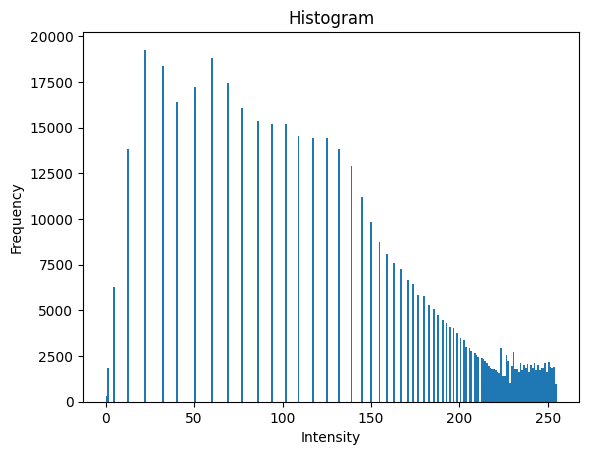

In [ ]:
### show grayscale image and its distribution of pixel value
### (before histogram equalization)

### read and grayscale the image (TODO)
img_gray = cv2.imread('Problem_A1.png')
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)

# download grayscale image (before histogram equalization)
cv2.imwrite('A1_before histogram equalization.jpg', img_gray)

# draw histogram of img_gray
plt.figure()
plt.title('Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.hist(img_gray.ravel(), 256, [0, 255])
plt.show()

'''
implement histogram equalization, and then
show the image after histogram equalization and its distribution of pixel value
'''

# implement histogram equalization (TODO)
img_equalized = HistEqualiztion(img_gray)

# download equalized image (after histogram equalization)
cv2.imwrite('A1_after histogram equalization.jpg', img_equalized)

# draw histogram of img_equalized
plt.figure()
plt.title('Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.hist(img_equalized.ravel(), 256, [0, 255])
plt.show()


## A2. Edge Detection

### Gaussian Smooth

In [ ]:
### Gaussian Smooth
def G(x, y, sigma):
    """
        Gaussian Function G
    """
    return 1/(2*math.pi*sigma*sigma) * math.exp(-(x*x+y*y)/(2*sigma*sigma))

def prepare_kernel(ksize, sigma):
    """
        Prepare Gaussian Kernel
    """
    kernel = np.zeros((ksize, ksize))
    k = ksize // 2
    for i in range(ksize):
        for j in range(ksize):
            kernel[i][j] = G(j-k, k-i, sigma)
    kernel = kernel / np.sum(kernel)
    return kernel

def gaussian_smooth(ksize, sigma, fname):
    """
        Gaussian Smooth Implementation
    """
    ### prepare kernel
    kernel = prepare_kernel(ksize, sigma)

    ### load image and split channel
    img = cv2.imread(fname)
    b, g, r = cv2.split(img)

    ### convolution
    conv2d = scipy.signal.convolve2d
    b_blur = conv2d(b, kernel)
    g_blur = conv2d(g, kernel)
    r_blur = conv2d(r, kernel)

    ### merge channel and write file
    blur = cv2.merge([b_blur, g_blur, r_blur])
    cv2.imwrite(f"{fname[:-4]}_kernel={ksize}.jpg", blur)

    return

In [ ]:
### Apply Gaussian Smooth
gaussian_smooth(ksize=5, sigma=5, fname="Problem_A2.jpg")
gaussian_smooth(ksize=10, sigma=5, fname="Problem_A2.jpg")

## Sobel Edge Detection

In [ ]:
### Sobel Edge Detection
def edge_detection(fname):
    """
        Sobel Edge Detection Implementation
    """
    ### define sobel operator (TODO)
    x_mask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    y_mask = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    ### load image
    img = cv2.imread(fname)

    ### convert image to gray scale (TODO)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ### compute Gx, Gy
    conv2d = scipy.signal.convolve2d
    Gx = conv2d(img_gray, x_mask)
    Gy = conv2d(img_gray, y_mask)

    ### compute magnitude
    grad = np.sqrt(Gx**2 + Gy**2)
    grad[np.abs(grad) < 2] = 0 # weak gradient filter

    ### write file
    cv2.imwrite(f"{fname[:-4]}_magnitude.jpg", grad)

    return

In [ ]:
### Apply Sobel Edge Detection
edge_detection(fname="Problem_A2.jpg")
edge_detection(fname="Problem_A2_kernel=5.jpg")
edge_detection(fname="Problem_A2_kernel=10.jpg")

# Report
## Problem A1:
### Before Histogram Equalization
![BeforeHE](https://drive.google.com/uc?export=view&id=1A0TrsTKHNwKnlK5RxJQzhy6gBhWe3VKE)
![PixelvalBefore](https://drive.google.com/uc?export=view&id=1BohyUKcU1Dg3hCvhemuImf3AF7Vmi_4S)

### After Histogram Equalization
![AfterHE](https://drive.google.com/uc?export=view&id=1QWf0SxIiWM-L1kecUWiwKDW1mCFDXKV4)
![PixelvalAfter](https://drive.google.com/uc?export=view&id=1eVxrWbtHxbnh8z9ILe99_VW1rN4YhwI1)

We can see that after performing histogram equalization, there is an increased contrast in the image, such that dark areas become brighter and bright areas become darker, so that details in shadows and highlights are more visible. We can also see that hidden details in low-contrast areas become more prominent.

For the distribution of the pixel value, we can see that before performing histogram equalization, the intensity distribution is uneven. It is skewed or clustered in the early range and it is concentrated in a narrow intensity range. But after performing histogram equalization, it becomes more uniform. The pixel intensities are spread out more evenly across the entire available range (0-255). Since the image now utilizes a wider range of brightness levels, contrast is improved.

## Problem A2:
### Input Images and Edge Detection Results

### Original
![OriBefore](https://drive.google.com/uc?export=view&id=12dZhmtlHxz1jr2Xb-UnVkCpJUQe1QUqn)
![OriAfter](https://drive.google.com/uc?export=view&id=1l4V2wfQynvj07jBaeUMAgORl33gKyLZJ)

### Kernel Size 5
![K5Before](https://drive.google.com/uc?export=view&id=1HjY54Z5i39Ws4Wy5xoFz9893CbNguiNZ)
![K5After](https://drive.google.com/uc?export=view&id=1PN-ABHt6ipHlYCvwr6uzOI3chBpJeRpo)

### Kernel Size 10
![K10Before](https://drive.google.com/uc?export=view&id=14WRojWLhXfx52WA47QqjSoM7S9JW7T36)
![K10After](https://drive.google.com/uc?export=view&id=1-gc0bldjxf88r5l7lYhEU3ywSKLeB4wk)

### Observation

Original Image: We can see that the edge detection result is highly detailed. It captures fine textures and noise along with strong edges.
The output is noisy, with many thin and broken edges.

Kernel Size 5: Since we perform moderate smoothing, the edge detection result reduces noise while preserving important edges. Fine details and weak edges starts to fade because of the blur that is applied on the image. Also, edges are slightly thicker and more continuous compared to the original.

Kernel Size 10: After applying a stronger smoothing to the image, it significantly reduces noise and removes weak edges for the edge detection result. We can see that only prominent edges remain, while fine details are lost. The detected edges are thicker and more blurred, leading to a less sharp appearance.